<a href="https://colab.research.google.com/github/Jackyscy/ChurchMV/blob/master/Temperature_Spread_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
data = pd.read_csv("GT data for 3-hour intervel learning1.csv", parse_dates=["Date_Time"],
        index_col=["Date_Time"],)

data.head()

,Combust Monitor Actual Spread 1,Turb Exhaust T1,Turb Exhaust T2,Turb Exhaust T3,Turb Exhaust T4,Turb Exhaust T5,Turb Exhaust T6,Turb Exhaust T7,Turb Exhaust T8,Turb Exhaust T9,...,GT Compres Disch Press,GT Compres Discharge Temp,GT Compres Inlet Temp,GT Exhaust Gas Flow,GT Exhaust Outlet Temp.1,GT Fuel Gas Mass Flow,GT IGV Position,GT Turbine Inlet Temp,GT Gross MW,GT Baseload Power Output Expected
Date_Time,,,,,,,,,,,,,,,,,,,,,
2021-09-05 13:50:00,31.056818,617.558472,630.641113,623.100586,624.433838,622.997681,629.324280,624.259338,613.819336,614.424744,...,1506.065918,409.284668,29.372759,617.549011,621.798584,12.966751,87.996284,1246.550537,211.845764,229.368973
2021-09-05 16:50:00,29.123943,617.433899,627.732971,620.316772,625.417481,625.806457,631.588562,623.166626,613.281372,616.283813,...,1495.955322,410.848724,30.342381,616.006531,622.049377,12.882809,87.994431,1247.431152,211.376907,228.132767
2021-09-05 19:50:00,29.981073,617.737305,626.815002,620.644348,626.150207,626.840393,632.476074,623.707764,613.928162,616.272095,...,1503.727417,410.733215,30.131554,619.785584,622.694458,12.721853,87.991333,1247.777954,212.360016,228.515640
2021-09-06 10:50:00,29.942198,616.953918,624.698975,621.066834,625.358582,623.719666,631.418030,620.302856,611.742188,617.621704,...,1492.666870,412.803863,30.939713,611.674560,623.366028,12.585037,88.001442,1248.785034,209.649109,227.099030
2021-09-06 13:50:00,27.763840,616.664490,623.856750,619.643860,624.923584,625.768555,631.285461,621.734375,612.153931,616.143250,...,1484.694092,412.501587,30.283035,618.603455,622.350586,12.714616,88.000969,1246.161621,210.130875,227.029388


In [166]:
data.tail()

,Combust Monitor Actual Spread 1,Turb Exhaust T1,Turb Exhaust T2,Turb Exhaust T3,Turb Exhaust T4,Turb Exhaust T5,Turb Exhaust T6,Turb Exhaust T7,Turb Exhaust T8,Turb Exhaust T9,...,GT Compres Disch Press,GT Compres Discharge Temp,GT Compres Inlet Temp,GT Exhaust Gas Flow,GT Exhaust Outlet Temp.1,GT Fuel Gas Mass Flow,GT IGV Position,GT Turbine Inlet Temp,GT Gross MW,GT Baseload Power Output Expected
Date_Time,,,,,,,,,,,,,,,,,,,,,
2023-09-04 13:50:00,28.114704,632.548584,638.530884,631.855469,633.613098,630.974243,642.091248,634.606018,620.106750,626.998962,...,1458.109741,412.556183,32.354118,596.771118,633.733215,12.701917,88.007835,1258.171509,204.570252,222.550369
2023-09-04 16:50:00,27.892914,633.106567,637.187439,631.111633,633.411438,634.061890,644.028442,634.482605,619.937988,627.750977,...,1454.895142,411.719696,32.256824,595.678467,633.727844,12.690415,87.997871,1257.593872,204.507431,222.480560
2023-09-04 19:50:00,27.304697,633.340698,636.345032,631.455933,636.031067,635.480286,643.962219,632.942932,619.241577,628.589172,...,1456.803223,411.852020,32.686016,599.527161,633.208740,12.707642,87.990623,1255.408325,204.294098,222.184906
2023-09-05 10:50:00,32.104561,633.002991,637.250061,631.297852,632.999329,627.444763,640.027466,629.346619,608.981079,623.630615,...,1476.278320,410.778625,30.237215,606.179260,630.595703,12.860698,87.973885,1257.222900,208.281952,227.718658
2023-09-05 13:50:00,29.274269,635.149780,642.015808,631.123230,631.984192,632.994080,642.784119,632.501770,616.314880,625.491943,...,1461.647827,413.377594,31.664816,599.825195,632.783081,12.715439,87.992363,1259.505859,205.621628,224.121460


In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 2021-09-05 13:50:00 to 2023-09-05 13:50:00
Data columns (total 53 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Combust Monitor Actual Spread 1    3239 non-null   float64
 1   Turb Exhaust T1                    3239 non-null   float64
 2   Turb Exhaust T2                    3239 non-null   float64
 3   Turb Exhaust T3                    3239 non-null   float64
 4   Turb Exhaust T4                    3239 non-null   float64
 5   Turb Exhaust T5                    3239 non-null   float64
 6   Turb Exhaust T6                    3239 non-null   float64
 7   Turb Exhaust T7                    3239 non-null   float64
 8   Turb Exhaust T8                    3239 non-null   float64
 9   Turb Exhaust T9                    3239 non-null   float64
 10  Turb Exhaust T10                   3239 non-null   float64
 11  Turb Exhaust T11    

<Axes: >

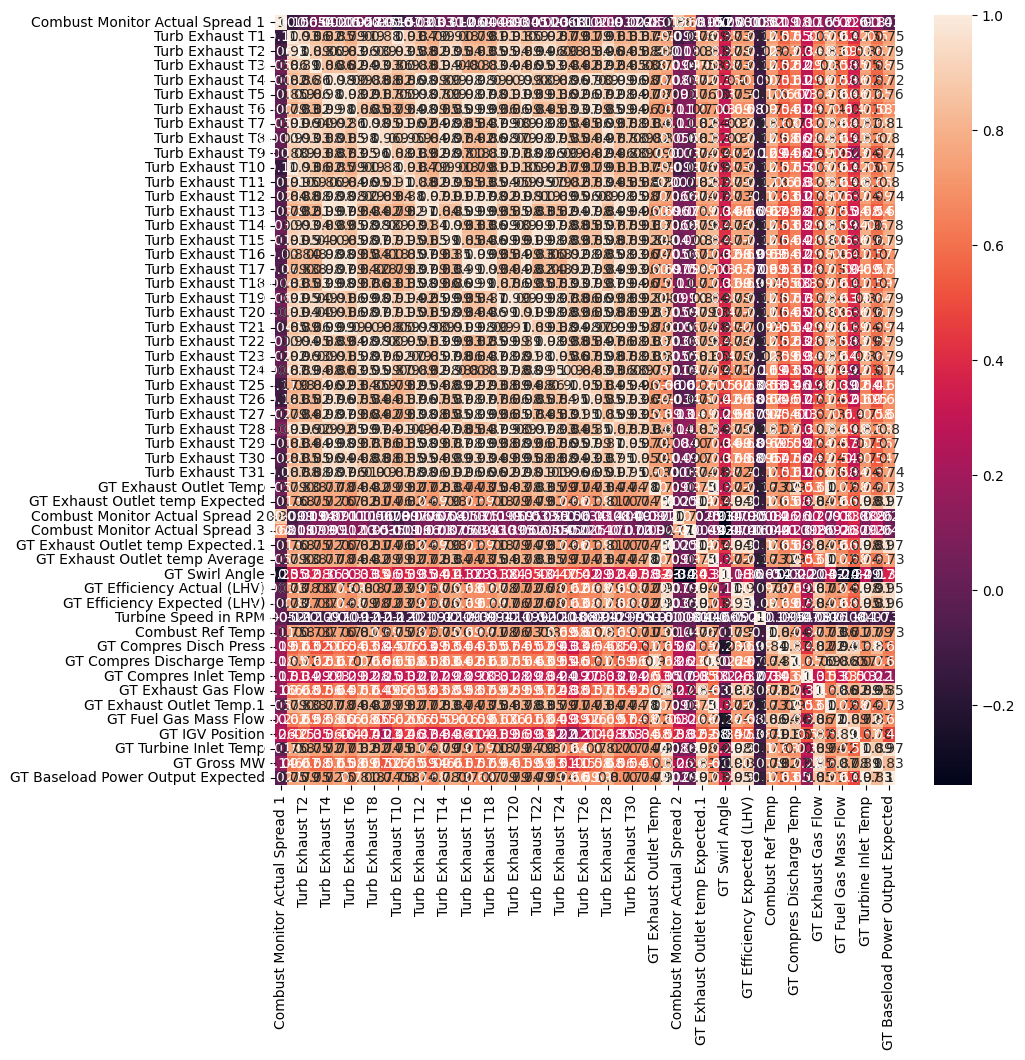

In [168]:
fig, ax = plt.subplots(figsize=(10,10))

corr = data.corr()
sns.heatmap(corr , annot = True , ax=ax)

Comment above: It is hard to see the number of correction for each features

In [169]:
#print("Slewness in Column: Combust Monitor Actual Spread 1", data["Combust Monitor Actual Spread 1"].skew)

#plt.hist(data["Combust Monitor Actual Spread 1"])
#plt.show()

Normal disctribustion can be used for the

In [170]:
#from scipy import stats

#col_cox , lam = stats.boxcox(data["Combust Monitor Actual Spread 1"])[0:2]
#print("Skewness in Column : Sqrt Combust Monitor Actual Spread 1s " ,pd.Series(col_cox).skew())

#plt.hist(col_cox)
#plt.show()

In [171]:
data["Combust Monitor Actual Spread 1"] = col_cox

In [172]:
remaining_columns = list(data.columns)
remaining_columns.remove("Combust Monitor Actual Spread 1")

In [173]:
X = data[remaining_columns].values
Y = data['Combust Monitor Actual Spread 1'].values

In [174]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [175]:
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Xtrain = Scaler.fit_transform(Xtrain)
Xtest = Scaler.transform(Xtest)

In [176]:
Xtrain.shape , Xtest.shape

((2591, 52), (648, 52))

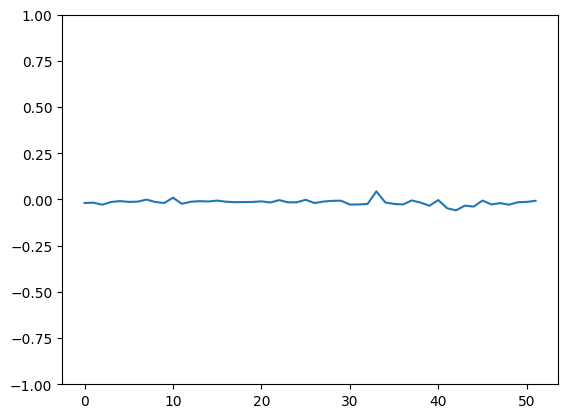

In [177]:
# check whether data is standardized or not
# mean should be 1

plt.ylim(-1,1)

means = []
for i in range(X.shape[1]):
    means.append(np.mean(Xtest[:,i]))
plt.plot(means , scaley=False)

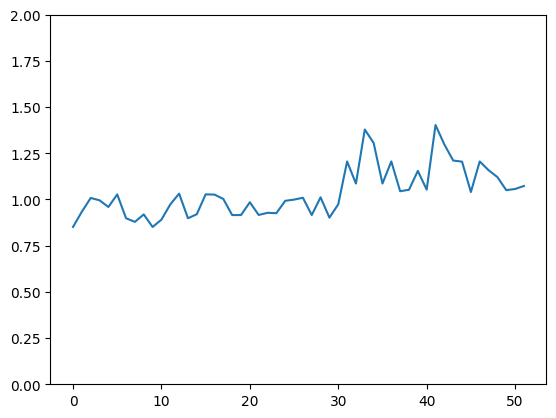

In [178]:
# Check variances

plt.ylim(0,2)

vars = []
for i in range(X.shape[1]):
    vars.append(np.var(Xtest[:,i]))
plt.plot(vars)

In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

model = LinearRegression()
rfecv = RFECV(model , step = 1, min_features_to_select = 13 , n_jobs = -1)
rfecv.fit(Xtrain , Ytrain)

RFECV(estimator=LinearRegression(), min_features_to_select=13, n_jobs=-1)

In [208]:
rfecv.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [209]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1])

In [210]:
selected_features = np.where(rfecv.support_)[0]
Xtrain = Xtrain[:,selected_features]
Xtest = Xtest[:,selected_features]

In [211]:
selected_features

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48])

In [183]:
model.fit(Xtrain , Ytrain)

LinearRegression()

In [184]:
model.coef_

array([-0.018713  , -0.10803163, -0.02442858,  0.18209345, -0.12677886,
       -0.00833946,  0.07429133, -0.27313741, -0.04181877, -0.018713  ,
       -0.26500029, -0.07395449,  0.22266428, -0.38735427, -0.01327423,
        0.00498231, -0.30752391, -0.09814578,  0.60925251, -0.06988932,
        0.48910023,  0.28222384,  0.01968724,  0.12328014, -0.16295115,
        0.06185499,  0.14617867,  0.09038065, -0.23396862,  0.01263317,
       -0.17205649, -0.01100948,  0.03246304,  0.14472813,  0.03465719,
        0.03246304, -0.01100948, -0.11630837, -0.21248797, -0.01017972,
        0.09630865, -0.03298992,  0.05849806,  0.0226994 , -0.0237974 ,
       -0.01100948,  0.2467199 , -0.12536164,  0.07003303])

In [185]:
model.intercept_

3.708574244898035

In [186]:
model.coef_.dot(Xtest[10,:]) + model.intercept_

3.7102584931410405

In [187]:
model.score(Xtest , Ytest)

0.9093008786999442

In [188]:
from sklearn.linear_model import Ridge , Lasso , ElasticNet , LinearRegression

In [212]:
model = LinearRegression()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.8880840181569449
 Testing Accuracy :  0.9093008786999442


In [190]:
model = Ridge()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.8872543504383358
 Testing Accuracy :  0.9109868513313445


In [191]:
model = Lasso()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.0
 Testing Accuracy :  -9.76222232884627e-05


In [192]:
# Elastic

# lambda_1*L1 + lambda_2*L2
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet()
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.0
 Testing Accuracy :  -9.76222232884627e-05


Changing Parameter for Lasso and ElasticNet

In [193]:
model = Lasso(alpha = 0.01)
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7800738396684639
 Testing Accuracy :  0.8043806423527489


In [194]:
# Elastic

# lambda_1*L1 + lambda_2*L2
# alpha = lambda_1 + lambda_2 , l1_ratio = lambda_1/(lambda_1 + lambda_2)

model = ElasticNet(alpha = 0.01 + 0.01 , l1_ratio = 0.01/(0.01 + 0.01))
model.fit(Xtrain , Ytrain)
print(" Training Accuracy : " , model.score(Xtrain , Ytrain))
print(" Testing Accuracy : " , model.score(Xtest , Ytest))

 Training Accuracy :  0.7788849769423397
 Testing Accuracy :  0.802714432160933


In [195]:
linear_model = Lasso(alpha=100, random_state=0)

linear_model.fit(Xtrain, Ytrain)

Lasso(alpha=100, random_state=0)